# And/Or 연산을 수행하는 퍼셉트론

In [23]:
def perceptron(x1, x2, bias):
    result = x1*w1 + x2*w2 + bias
    if result <= 0:
        return 0
    else:
        return 1


In [24]:
print("AND Gate")
w1 = float(input("Enter the weight for x1: "))
w2 = float(input('Enter the weight for x2: '))
bias = float(input("Enter the bias"))

for xs in [(1, 1), (1, 0), (0, 1), (0, 0)]:
    result = perceptron(xs[0], xs[1], bias)
    print(xs,':', result)

AND Gate
(1, 1) : 1
(1, 0) : 1
(0, 1) : 1
(0, 0) : 1


In [25]:
print("OR Gate")
w1 = float(input("Enter the weight for x1: "))
w2 = float(input('Enter the weight for x2: '))
bias = float(input("Enter the bias"))

for xs in [(1, 1), (1, 0), (0, 1), (0, 0)]:
    result = perceptron(xs[0], xs[1], bias)
    print(xs,':', result)

OR Gate
(1, 1) : 1
(1, 0) : 1
(0, 1) : 1
(0, 0) : 1


# 단층 퍼셉트론 연습

In [26]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np 
import pandas as pd

In [27]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)

In [28]:
clf = Perceptron(max_iter=1000, eta0=0.1,tol=0.001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 2,  9,  7],
       [ 0,  0, 11]], dtype=int64)

# 다층 퍼셉트론 연습

In [30]:
import tensorflow as tf

tf.__version__

'2.9.0'

#심층 신경망

In [31]:
#Keras 설치

In [32]:
#!pip install --upgrade tensorflow

In [33]:
#!pip install upgrade keras

In [34]:
import keras

In [35]:
keras.__version__

'2.9.0'

### [실습 1] Keras를 활용한 심층신경망 모델 구현(붓꽃 분류)

In [36]:
#1) 데이터 전처리 및 분할
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target



In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, 3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
#2) 인공 신경망 모형 구성
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, input_dim=4, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [40]:
# 3) 모형의 학습과정 설정
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics='accuracy')


In [41]:
# 4)모델 학습
hist = model.fit(X_train,y_train,epochs=100,batch_size=10,
          verbose=2)

Epoch 1/100
11/11 - 0s - loss: 1.7116 - accuracy: 0.3714 - 286ms/epoch - 26ms/step
Epoch 2/100
11/11 - 0s - loss: 1.5269 - accuracy: 0.3714 - 9ms/epoch - 861us/step
Epoch 3/100
11/11 - 0s - loss: 1.3611 - accuracy: 0.3714 - 10ms/epoch - 893us/step
Epoch 4/100
11/11 - 0s - loss: 1.1918 - accuracy: 0.3714 - 10ms/epoch - 910us/step
Epoch 5/100
11/11 - 0s - loss: 1.0759 - accuracy: 0.4190 - 9ms/epoch - 780us/step
Epoch 6/100
11/11 - 0s - loss: 0.9805 - accuracy: 0.4571 - 9ms/epoch - 818us/step
Epoch 7/100
11/11 - 0s - loss: 0.9001 - accuracy: 0.4667 - 12ms/epoch - 1ms/step
Epoch 8/100
11/11 - 0s - loss: 0.8300 - accuracy: 0.4571 - 9ms/epoch - 815us/step
Epoch 9/100
11/11 - 0s - loss: 0.7742 - accuracy: 0.4381 - 8ms/epoch - 730us/step
Epoch 10/100
11/11 - 0s - loss: 0.7311 - accuracy: 0.4762 - 10ms/epoch - 889us/step
Epoch 11/100
11/11 - 0s - loss: 0.6938 - accuracy: 0.5714 - 8ms/epoch - 700us/step
Epoch 12/100
11/11 - 0s - loss: 0.6663 - accuracy: 0.7429 - 9ms/epoch - 818us/step
Epoch 13/1

In [42]:
# epoch별 손실함수 값, 평가지표 시각화
pd.DataFrame(hist.history)

,loss,accuracy
0,1.711643,0.371429
1,1.526940,0.371429
2,1.361104,0.371429
3,1.191835,0.371429
4,1.075853,0.419048
...,...,...
95,0.238974,0.961905
96,0.237349,0.961905
97,0.236497,0.961905
98,0.231701,0.961905


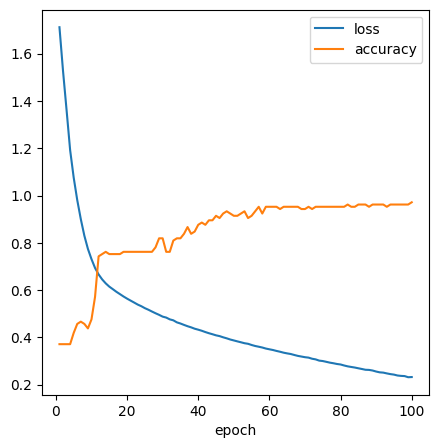

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(range(1, 101), hist.history['loss'], label='loss')
plt.plot(range(1, 101), hist.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [46]:
# 5) 모형의 성능평가
loss, acc = model.evaluate(X_test,y_test)
print(f"loss={loss:.3f}")
print(f"accuracy = {acc:.3f}")


2/2 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.9778
loss=0.243
accuracy = 0.978


In [48]:
np.set_printoptions(suppress=True)

In [56]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[0.0000947 , 0.11762462, 0.88228065],
       [0.01848586, 0.65637034, 0.32514375],
       [0.9838727 , 0.01612373, 0.00000357],
       [0.00006751, 0.14758894, 0.8523435 ],
       [0.9717291 , 0.02825068, 0.00002017],
       [0.00003934, 0.1131347 , 0.8868259 ],
       [0.9705747 , 0.02940281, 0.00002251],
       [0.00974661, 0.71024   , 0.2800133 ],
       [0.00533919, 0.5930068 , 0.401654  ],
       [0.0301985 , 0.77648443, 0.19331706],
       [0.0005607 , 0.28350836, 0.7159309 ],
       [0.01717901, 0.7784543 , 0.20436664],
       [0.01117054, 0.69401515, 0.29481432],
       [0.00600091, 0.59000283, 0.40399626],
       [0.00825961, 0.65511954, 0.33662078],
       [0.9772807 , 0.02270857, 0.00001077],
       [0.00925163, 0.6548334 , 0.335915  ],
       [0.01272511, 0.6606591 , 0.32661584],
       [0.95769453, 0.0422421 , 0.0000634 ],
       [0.9751831 , 0.02480494, 0.00001193],
       [0.00065571, 0.26746798, 0.7318764 ],
       [0.01162245, 0.6939423 , 0.2944352 ],
       [0.

In [57]:
# 클래스 이름을 알기위한 추가 코딩이 필요
y_pred_class = np.argmax(y_pred, axis=-1)
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [58]:
y_test_class = np.argmax(y_test, axis=-1)

In [61]:
accuracy_score(y_test_class,y_pred_class)

0.9777777777777777

In [45]:
#6)  임의 데이터에 대해 모형의 출력을 확인한다.

